<a href="https://colab.research.google.com/github/truongnc160466/main1/blob/main/VNeseStreetFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Data Import

Dataset: annotation-sheet.csv


*   [Dataset Github Link](https://github.com/truongnc160466/main1/blob/4b453c52860c1a40065d7974bb177d32b46ff74c/annotation_sheet.csv)
*   [RAW Dataset Link](https://raw.githubusercontent.com/truongnc160466/main1/4b453c52860c1a40065d7974bb177d32b46ff74c/annotation_sheet.csv)


1 - Data Retrieve

In [75]:
# Raw dataset link goes here
url = 'https://raw.githubusercontent.com/truongnc160466/main1/4b453c52860c1a40065d7974bb177d32b46ff74c/annotation_sheet.csv'
df = pd.read_csv(url)

# Shuffle data (for fun, we'll shuffle the training set later anyway)
df = df.sample(frac = 1).reset_index(drop = True)

df.head()

,no,video_index,student_id,student_name,video_id,standardized_dish,dish_occurence,dish_imply,duration,start_time,...,standardized_sauce,sauce,venue,container,recipes,viewer_feeling,food_feeling,youtuber_feeling,location,foreigner
0,2002,560,SE160939,Dương Trung Hiếu,01elJD9NF3U,Salad roll,Salad roll,Rau cuốn,13,02:28,...,NaN,Sốt cá,casual,plate,0,3,3,3,Nha Trang,1
1,2795,779,SE161160,Nguyễn Thành Trị,6aepW0fDW0g,banh mi,banh mi,banh mi,43,00:48,...,NaN,NaN,street,other,0,3,3,4,Hoi An,1
2,641,147,NaN,NaN,9R8LzNUW4s4,fried lobster,lobster claw,NaN,72,13:11,...,fish sauce with spices,butter garlic sauce,fine,plate,1,5,2,5,HCM,1
3,3184,896,SE160793,Nguyễn Hữu Anh Tiến,3LgVL5mtqy0,grilled beef,beef,bò nướng,289,00:48,...,fish sauce,fish sauce,fine,plate,1,5,5,5,Nha Trang,1
4,277,53,NaN,NaN,r1BzB2-Cx7k,boiled snail,snail,ốc bươu hấp,80,13:54,...,fish sauce with spices,nước mắm,casual,plate,0,4,2,4,HN,1


2 - Data Description

In [76]:
print('Dataframe info: ')
df.info()
print('\n\n')
print('Dataframe description: ')
df.describe().transpose()

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   no                              3757 non-null   int64 
 1   video_index                     3757 non-null   int64 
 2   student_id                      2884 non-null   object
 3   student_name                    2884 non-null   object
 4   video_id                        3757 non-null   object
 5   standardized_dish               3757 non-null   object
 6   dish_occurence                  3313 non-null   object
 7   dish_imply                      3159 non-null   object
 8   duration                        3757 non-null   int64 
 9   start_time                      3757 non-null   object
 10  end_time                        3757 non-null   object
 11  standardized_ingredient         3119 non-null   object
 12  no_ingredient                  

,count,mean,std,min,25%,50%,75%,max
no,3757.0,1879.000000,1084.696809,1.0,940.0,1879.0,2818.0,3757.0
video_index,3757.0,515.537131,315.761411,1.0,234.0,527.0,786.0,1068.0
duration,3757.0,110.310088,921.869713,0.0,26.0,60.0,118.0,55958.0
no_ingredient,3757.0,3.284802,2.806564,0.0,1.0,3.0,5.0,20.0
recipes,3757.0,0.274421,0.446281,0.0,0.0,0.0,1.0,1.0
viewer_feeling,3757.0,3.740484,0.925898,1.0,3.0,4.0,4.0,5.0
food_feeling,3757.0,3.412563,1.172153,1.0,2.0,4.0,4.0,5.0
youtuber_feeling,3757.0,4.195369,0.860721,1.0,4.0,4.0,5.0,5.0
foreigner,3757.0,0.933191,0.249724,0.0,1.0,1.0,1.0,1.0


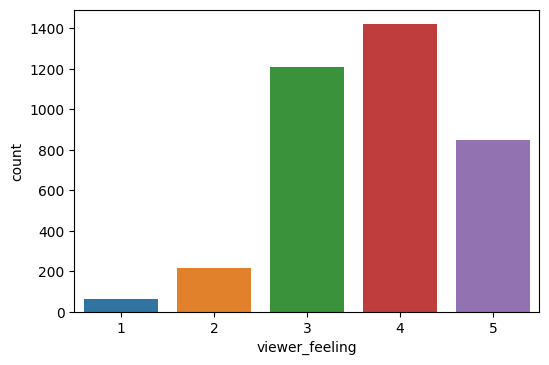

In [77]:
plt.figure(dpi = 100)
ax = sns.countplot(data = df, x = 'viewer_feeling')
plt.show()

# Data Preprocessing

1.1 - One Hot Encoding (Columns = venue, container)

In [78]:
label_df = pd.get_dummies(df[['venue', 'container']], prefix = {'venue', 'container'})

1.2 - Data Scaling (Columns = duration, no_ingredient)

In [80]:
df[["duration"]] = MinMaxScaler().fit_transform(df[["duration"]])
df[["no_ingredient"]] = MinMaxScaler().fit_transform(df[["no_ingredient"]])

2 - Define Features (X) And Data Values (Y)

In [81]:
input = np.array(df[['duration', 'no_ingredient', 'recipes']].join(label_df))
output = np.array(df[['viewer_feeling']])

# output =  pd.get_dummies(df['viewer_feeling'], prefix = 'viewer_feeling')

input_train, input_test, output_train, output_test = train_test_split(input, output, test_size = 0.2)

print(input.shape, output.shape)

(3757, 17) (3757, 1)


In [82]:
df[['duration', 'no_ingredient', 'recipes']].join(label_df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          3757 non-null   float64
 1   no_ingredient     3757 non-null   float64
 2   recipes           3757 non-null   int64  
 3   container_casual  3757 non-null   uint8  
 4   container_fine    3757 non-null   uint8  
 5   container_other   3757 non-null   uint8  
 6   container_street  3757 non-null   uint8  
 7   venue_bag         3757 non-null   uint8  
 8   venue_bottle      3757 non-null   uint8  
 9   venue_bowl        3757 non-null   uint8  
 10  venue_box         3757 non-null   uint8  
 11  venue_glass       3757 non-null   uint8  
 12  venue_hands_on    3757 non-null   uint8  
 13  venue_other       3757 non-null   uint8  
 14  venue_plate       3757 non-null   uint8  
 15  venue_pot         3757 non-null   uint8  
 16  venue_tray        3757 non-null   uint8  


# Model Building

1 - Function Definitions

In [95]:
# SeLU Function
def selu(x):
  scale = float(1.0507009873554804934193349852946)
  alpha = float(1.6732632423543772848170429916717)
  return np.where(x > 0, scale * x, scale * alpha * (np.exp(x) - 1))
def selu_deri(x):
  scale = float(1.0507009873554804934193349852946)
  alpha = float(1.6732632423543772848170429916717)
  return np.where(x > 0, scale, scale * alpha * np.exp(x))

# Mean Squared Error Loss
def mse(y_true, y_pred):
  return np.mean(np.power(y_true - y_pred, 2));

def mse_deri(y_true, y_pred):
  return 2*(y_pred - y_true)/y_true.size;

# Sigmoid Function
def sigmoid(x):
  return 1/(1 + np.exp(-x))
def sigmoid_deri(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Accuracy Function
def accuracy(y_true, y_pred):
  y_true = np.argmax(y_true, axis = 1)
  y_pred = np.argmax(y_pred, axis = 1)
  return np.mean(np.array((y_true == y_pred)).astype(int), axis = 0)

def bin_accuracy(y_true, y_pred):
  y_pred = np.where(y_pred > 0.5, 1, 0)
  return np.mean(np.array((y_true == y_pred)).astype(int), axis = 0)

2 - Build The Model

In [96]:
class Dense:
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        limit = np.sqrt(2 / float(input_size + output_size))

        self.weights = np.random.normal(0.0, limit, size = (input_size, output_size))
        self.bias = np.zeros((1, output_size))

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error = dE/dY. Returns input_error = dE/dX
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        # dBias = output_error

        # updates parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * np.sum(output_error, axis = 0)
        return input_error

In [98]:
class Activation:
    def __init__(self, activation, activation_deri):
        self.activation = activation
        self.activation_deri = activation_deri

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # returns input_error = dE/dX for a given output_error = dE/dY
    # learning_rate is not used because there is no "learnable" parameters
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_deri(self.input) * output_error 

In [102]:
class Model:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_deri = None

    # adds layers to the network
    def add(self, layer):
        self.layers.append(layer)

    # sets loss to use
    def use(self, loss, loss_deri, acc):
        self.loss = loss
        self.loss_deri = loss_deri
        self.acc = acc

    # predicts output for given input
    def predict(self, input_data):
        # samples dimension first
        samples = len(input_data)

        # forward propagation
        output = input_data
        for layer in self.layers:
            output = layer.forward_propagation(output)
        return output

    # trains the network
    def fit(self, x_train, y_train, x_test, y_test, epochs = 10, batches = 64, learning_rate = 0.1, verbose = 1):
        # samples dimension first
        samples = len(x_train)

        # training loops
        for i in range(epochs):
            x = x_train.copy()
            y = y_train.copy()

            x, y = shuffle(x, y)

            loss = 0
            acc = 0

            iterate = samples//batches + 1
            for j in range(iterate):
                # forward propagation
                output = x[j*batches:(j + 1)*batches]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # calculates loss (for display purpose only)
                loss += self.loss(y[j*batches:(j + 1)*batches], output)
                # calculates accuracy
                acc += self.acc(y[j*batches:(j + 1)*batches], output)
                    
                # backward propagation
                error = self.loss_deri(y[j*batches:(j + 1)*batches], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            loss /= iterate
            acc /= iterate

            y_pred = self.predict(x_test)
            val_acc = self.acc(y_test, y_pred)
            if verbose == 1:
               print('epochs %d/%d   error = %f   accuracy = %f   validation_accuracy = %f' % (i + 1, epochs, loss, acc, val_acc))

In [103]:
def pred_stat(net):
    # generates predictions
    y_pred = net.predict(input_test)
    val_acc = net.acc(output_test, y_pred)

    print("accuracy: ", val_acc)
    tmp_array = np.array(np.argmax(y_pred, axis = 1))
    unique, counts = np.unique(tmp_array, return_counts = True)
    print(np.asarray((unique, counts)).T)

    tmp_array = np.array(np.argmax(output_test, axis = 1))
    unique, counts = np.unique(tmp_array, return_counts = True)
    print(np.asarray((unique, counts)).T)

In [130]:
# network
model = Model()
model.add(Dense(17, 100))
model.add(Activation(sigmoid, sigmoid_deri))
model.add(Dense(100, 200))
model.add(Activation(sigmoid, sigmoid_deri))
model.add(Dense(200, 5))
model.add(Activation(sigmoid, sigmoid_deri))

model.use(mse, mse_deri, accuracy)

print("Before training: ")
pred_stat(model)

# train
model.fit(input_train, output_train, input_test, output_test, epochs = 200, batches = 10, learning_rate = 0.001, verbose = 1)

print("After training: ")
pred_stat(model)

Before training: 
accuracy:  0.0
[[  4 752]]
[[  0 752]]
epochs 1/200   error = 8.569993   accuracy = 0.255150   validation_accuracy = 0.493351
epochs 2/200   error = 8.350825   accuracy = 0.559468   validation_accuracy = 0.570479
epochs 3/200   error = 8.334930   accuracy = 0.577076   validation_accuracy = 0.579787
epochs 4/200   error = 8.324416   accuracy = 0.590033   validation_accuracy = 0.585106
epochs 5/200   error = 8.324712   accuracy = 0.596013   validation_accuracy = 0.589096
epochs 6/200   error = 8.316419   accuracy = 0.598007   validation_accuracy = 0.590426
epochs 7/200   error = 8.327141   accuracy = 0.598671   validation_accuracy = 0.591755
epochs 8/200   error = 8.319680   accuracy = 0.599003   validation_accuracy = 0.589096
epochs 9/200   error = 8.314823   accuracy = 0.597010   validation_accuracy = 0.587766
epochs 10/200   error = 8.317133   accuracy = 0.596346   validation_accuracy = 0.589096
epochs 11/200   error = 8.314258   accuracy = 0.596346   validation_accu